<a href="https://colab.research.google.com/github/champsleague/Deep-Learning/blob/main/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle
from fastkaggle import *

In [ ]:
comp = 'muffin-vs-chihuahua-image-classification'
path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

In [ ]:
display(path)

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.5 MB/s eta 0:00:00
Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
# in order to use Bing API, change bing to ddg
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [6]:
# bear detector
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [7]:
dest = 'images.grizzly.jpg'
download_url(ims[0],dest,show_progress=False)

Path('images.grizzly.jpg')

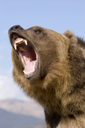

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
# repeat 3 of them
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [10]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest,urls=results)

In [11]:
fns = get_image_files(path)
fns

(#576) [Path('bears/teddy/95bf312a-a1f9-4a99-afda-5c4a06bfa0cc.jpg'),Path('bears/teddy/37fba6b5-23a3-4a20-9091-d1f9689cefc9.jpg'),Path('bears/teddy/ba5169da-9ffe-42ca-b3b4-0d8b24988b27.jpg'),Path('bears/teddy/40e350ca-acd8-45f0-8987-4ddad4bd77f8.jpg'),Path('bears/teddy/2352f46e-222c-4c47-97f9-5fa8178e92f5.jpg'),Path('bears/teddy/0f3c5de5-6865-4b81-b007-707c984815e2.jpg'),Path('bears/teddy/fc6fe4a0-c21e-4bbf-b522-a99d37b4663c.jpg'),Path('bears/teddy/b36b11d7-6c82-4833-a94e-8db339473eb0.jpg'),Path('bears/teddy/d62f9669-389d-475e-b1cd-0b36b96f1ed0.JPG'),Path('bears/teddy/b3131364-7489-4725-8bc2-5ec9b2f77fb5.jpg')...]

In [12]:
failed = verify_images(fns)
failed

(#11) [Path('bears/teddy/fc6fe4a0-c21e-4bbf-b522-a99d37b4663c.jpg'),Path('bears/teddy/dfe2af89-e196-4abc-bd3a-aa127f9d8bd2.jpg'),Path('bears/teddy/118d7c68-f63f-4c0a-b330-86fb3d655a60.jpg'),Path('bears/teddy/2b486b85-afe1-40d6-98a8-4759bf9bcfab.jpg'),Path('bears/teddy/cee08534-5b07-4676-b086-08004c3f4206.jpg'),Path('bears/teddy/4cd7fd1b-8c57-46da-b71f-5671c1ea1c82.jpg'),Path('bears/teddy/5c9909a5-649a-4ca7-9224-95cdd62e7060.jpg'),Path('bears/teddy/d44824b7-289f-43c3-9362-4f9de07272e9.jpg'),Path('bears/grizzly/573d7e66-33d9-4dfb-9efc-f9f5c8996cd6.jpg'),Path('bears/grizzly/417c098a-67ac-46b0-bec0-6c7bf89eb5e0.jpg')...]

In [13]:
failed.map(Path.unlink);